In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# General data processing and math
import numpy as np
import pandas as pd
import os

# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Stock related
import yfinance as yf

# Deep Learning
import tensorflow as tf

# Warning elimination
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/SP_500_dataset0/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/SP_500_dataset0/input/sp500_companies.csv
/content/drive/MyDrive/SP_500_dataset0/input/sp500_index.csv
/content/drive/MyDrive/SP_500_dataset0/input/sp500_stocks.csv


In [ ]:
SP500_Comp = pd.read_csv('/content/drive/MyDrive/SP_500_dataset0/input/sp500_companies.csv')
SP500_Comp.sample(5)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
488,NMS,PENN,"Penn National Gaming, Inc.","Penn National Gaming, Inc.",Consumer Cyclical,Resorts & Casinos,32.81,5561754624,1.450800e+09,0.531,Wyomissing,PA,United States,21973.0,"Penn National Gaming, Inc., together with its ...",0.000176
489,NYQ,VNO,Vornado Realty Trust,Vornado Realty Trust,Real Estate,REIT—Office,28.89,5537663488,7.640420e+08,0.130,New York,NY,United States,3224.0,Vornado's portfolio is concentrated in the nat...,0.000175
490,NYQ,ALK,"Alaska Air Group, Inc.","Alaska Air Group, Inc.",Industrials,Airlines,42.40,5374624256,8.790000e+08,0.741,Seattle,WA,United States,22092.0,"Alaska Air Group, Inc., through its subsidiari...",0.000170
491,NYQ,NCLH,Norwegian Cruise Line Holdings,Norwegian Cruise Line Holdings Ltd.,Consumer Cyclical,Travel Services,11.18,4660852736,-1.794137e+09,49.886,Miami,FL,United States,34700.0,"Norwegian Cruise Line Holdings Ltd., together ...",0.000147
492,NYQ,PVH,PVH Corp.,PVH Corp.,Consumer Cyclical,Apparel Manufacturing,58.03,4060800000,1.275100e+09,0.163,New York,NY,United States,19000.0,PVH Corp. operates as an apparel company world...,0.000128


| Column no | Features | Description |
|:---|:---|:---|
| 0 | Exchange | An open, organized marketplace where stocks, bonds, commodities, options and futures are traded |
| 1 | Symbol | "Ticker". Unique code given to a company listed on the exchange |
| 2 | Short name | Company's short name |
| 3 | Long name | Company's long name |
| 4 | Sector | Sector of the Company|
| 5 | Industry | Industry of the Company |
| 6 | Current price | Most recent selling price of a stock |
| 7 | Market cap | Market value of the company's outstanding shares. Calculated using $Current\:Price \times Outstanding\:shares$ |
| 8 | Ebitda | It’s a profitability calculation that measures how profitable a company is before paying interest to creditors, taxes to the government, and taking paper expenses like depreciation and amortization. It is calculated as $EBITDA\: = Net\:Income + Interest + Taxes + Depreciation + Amortization$ |
| 9 | Revenue growth | Increase (or decrease) in a company’s sales from one period to the next. It is calculated as $\dfrac {Current\:Period\:Sales - Prior\:Period\:Sales}{Prior\:Period\:Sales}$ |
| 10 | City | City of the Company's HQ |
| 11 | State | State of the Company's HQ |
| 12 | Country | Company's country of origin |
| 13 | Full time employees | Total full time employees in the company |
| 14 | Long business summary | Summary about the company's business |
| 15 | Weight | S&P 500 uses marketcap weighing method, where weight of each stock is calculated as $\dfrac{Company\:marker\:cap}{Total\:of\:all\:market\:cap}$ |


In [ ]:
# Providing missing data
SP500_Comp = SP500_Comp.drop(['State'], axis=1)
def replace_null(df, sym, col, missing):
    ticker = yf.Ticker(sym)
    df.loc[df['Symbol']==sym, col]= ticker.info[missing]

C = SP500_Comp[SP500_Comp['Revenuegrowth'].isnull()]
replace_null(SP500_Comp, *C['Symbol'].tolist(), 'Revenuegrowth', 'revenueGrowth')

SP500_Comp.loc[SP500_Comp['Fulltimeemployees'].isnull(), 'Fulltimeemployees'] = SP500_Comp['Fulltimeemployees'].mode()[0]



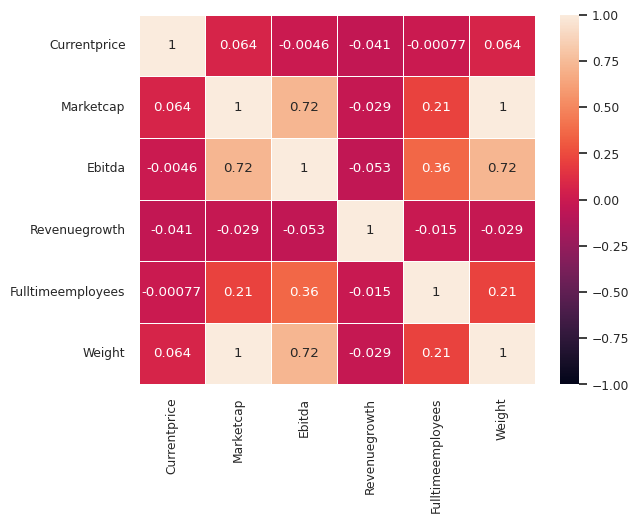

In [ ]:
SP_corr = SP500_Comp.corr()
mask = np.zeros_like(SP_corr)

sns.set(font_scale=0.8)
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots()
    ax = sns.heatmap(SP_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, annot = True)


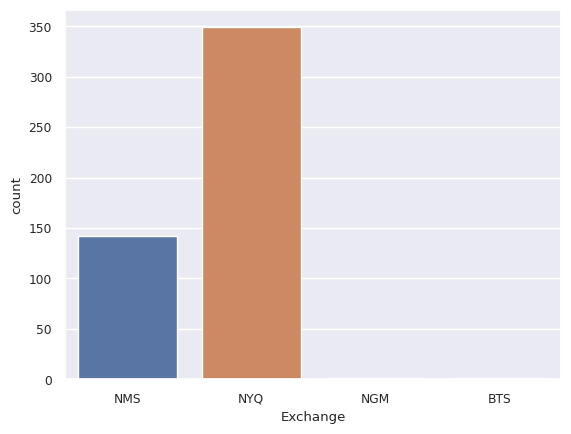

In [ ]:
p = sns.countplot(data=SP500_Comp, x='Exchange')

(0.0, 300000.0)

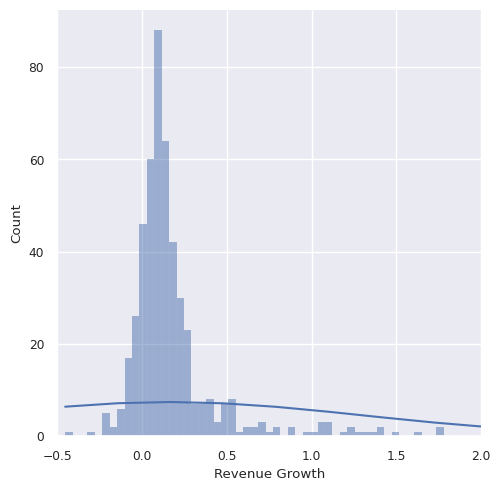

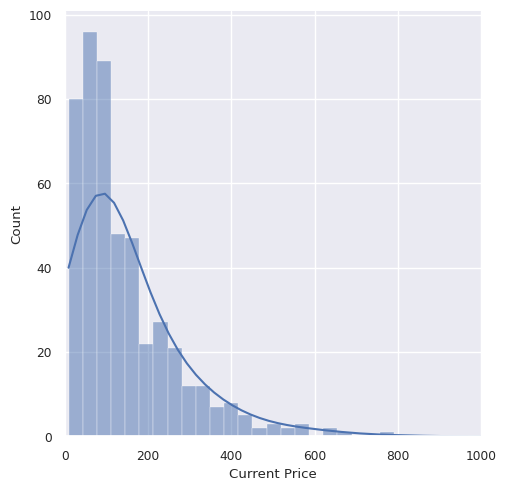

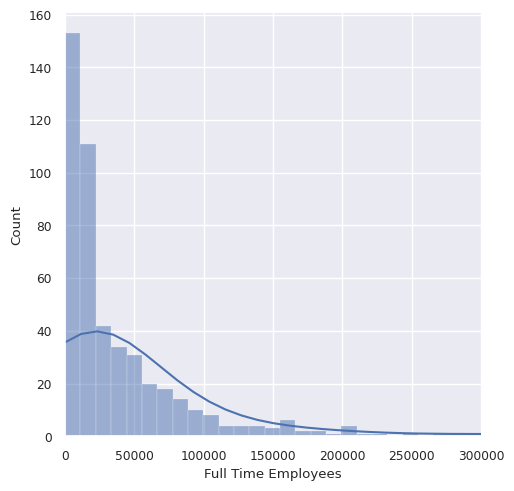

In [92]:
p0 = sns.displot(data=SP500_Comp, x="Revenuegrowth", kde=True)
p0.set(xlabel='Revenue Growth')
plt.xlim(-0.5,2)

p1 = sns.displot(data=SP500_Comp, x='Currentprice', kde=True)
p1.set(xlabel='Current Price')
plt.xlim(0, 1000)

p2 = sns.displot(data=SP500_Comp, x='Fulltimeemployees', kde=True)
p2.set(xlabel='Full Time Employees')
plt.xlim(0, 3e5)




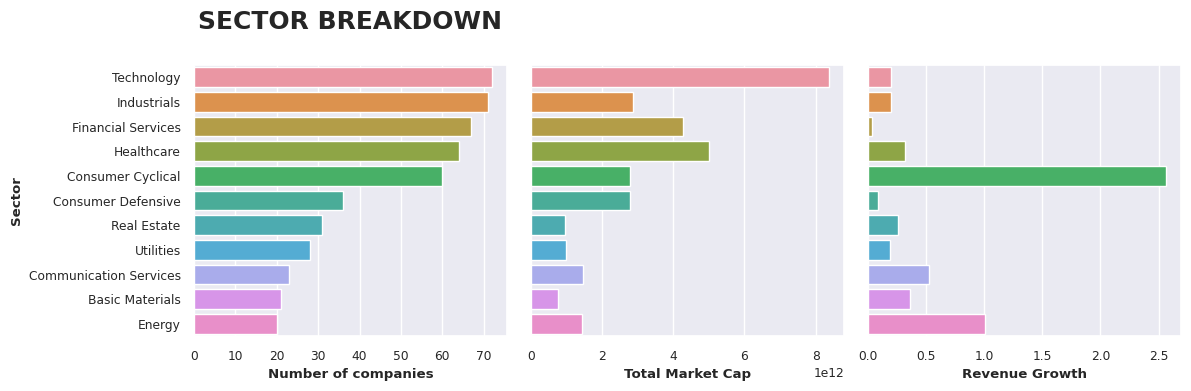

In [103]:
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = SP500_Comp.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

fig = plt.figure(num=None, figsize=(12, 4), dpi=100)

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown)
ax1.set_xlabel('Number of companies', weight='bold')
ax1.set_ylabel('Sector', weight = 'bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold').set_fontsize('18')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown)
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown)
ax2.set_xlabel('Revenue Growth', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])


plt.tight_layout();

Text(0.5, 1.0, 'Exchange % in S&P 500 Index')

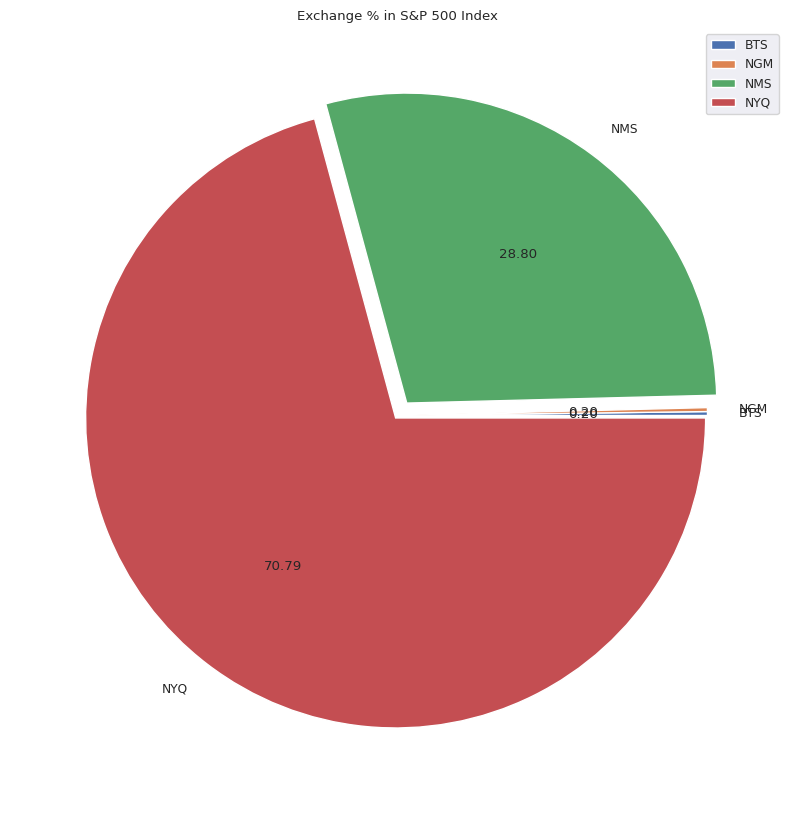

In [116]:
# # storing count values
# exchange_df = (SP500_Comp.groupby(["Exchange"]).size().reset_index(name="Counts").sort_values(by=["Exchange"]))
# labels = exchange_df['Exchange'].unique()
# values = exchange_df['Counts']

# plt.figure(figsize=(10,12))
# fig1 = plt.pie(x=values, labels=labels,explode=[0,0,0.05,0.01], autopct='%.2f')
# plt.legend()
# plt.title('Exchange % in S&P 500 Index')

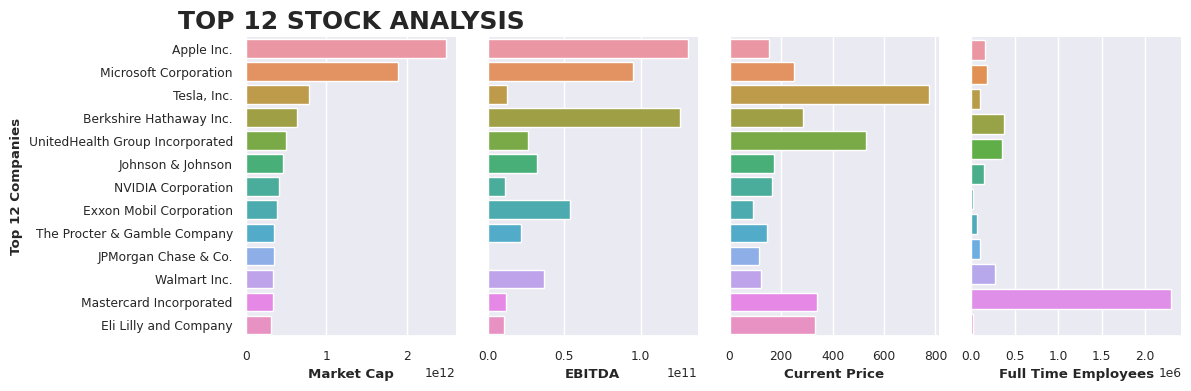

In [122]:
N = 12
fig2 = plt.figure(num=None, figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')

plt.subplot(1, 4, 1)
ax1 = sns.barplot(x=SP500_Comp.loc[:N,'Marketcap'], y=SP500_Comp.loc[:N,'Longname'], data=SP500_Comp)
ax1.set_xlabel('Market Cap', weight='bold')
ax1.set_ylabel(f'Top {N} Companies', weight = 'bold')
ax1.set_title(f'TOP {N} STOCK ANALYSIS', weight='bold').set_fontsize('18')

plt.subplot(1, 4, 2)
ax2 = sns.barplot(x=SP500_Comp.loc[:N,'Ebitda'], y=SP500_Comp.loc[:N,'Longname'], data=SP500_Comp)
ax2.set_xlabel('EBITDA', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 3)
ax2 = sns.barplot(x=SP500_Comp.loc[:N,'Currentprice'], y=SP500_Comp.loc[:N,'Longname'], data=SP500_Comp)
ax2.set_xlabel('Current Price', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 4, 4)
ax2 = sns.barplot(x=SP500_Comp.iloc[:N,12], y=SP500_Comp.iloc[:N,2], data=SP500_Comp)
ax2.set_xlabel('Full Time Employees', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

In [133]:
SP500_Stock = pd.read_csv('/content/drive/MyDrive/SP_500_dataset0/input/sp500_stocks.csv')
SP500_IDX = pd.read_csv('/content/drive/MyDrive/SP_500_dataset0/input/sp500_index.csv')
SP500_Stock.loc[SP500_Stock['Symbol']=='AAPL'].describe()

,Adj Close,Close,High,Low,Open,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,46.329852,47.878384,48.376082,47.338836,47.852493,2.622997e+08
std,44.982284,44.312672,44.840750,43.735565,44.277092,2.239613e+08
min,5.898014,6.858929,7.000000,6.794643,6.870357,4.100000e+07
25%,16.575515,18.767589,18.938304,18.609375,18.750000,1.053441e+08
50%,26.934808,29.056250,29.332500,28.858750,29.100000,1.753422e+08
75%,51.480631,52.541876,53.177499,52.078125,52.540001,3.560851e+08
max,182.009995,182.009995,182.940002,179.119995,182.630005,1.880998e+09


In [134]:
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

# AAPL.describe()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000,AMAZON
2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100,AMAZON
2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700,AMAZON
2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100,AMAZON
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON
2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400,AMAZON
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500,AMAZON
2023-08-01,133.550003,133.690002,131.619995,131.690002,131.690002,42098500,AMAZON
2023-08-02,130.149994,130.229996,126.820000,128.210007,128.210007,51027600,AMAZON


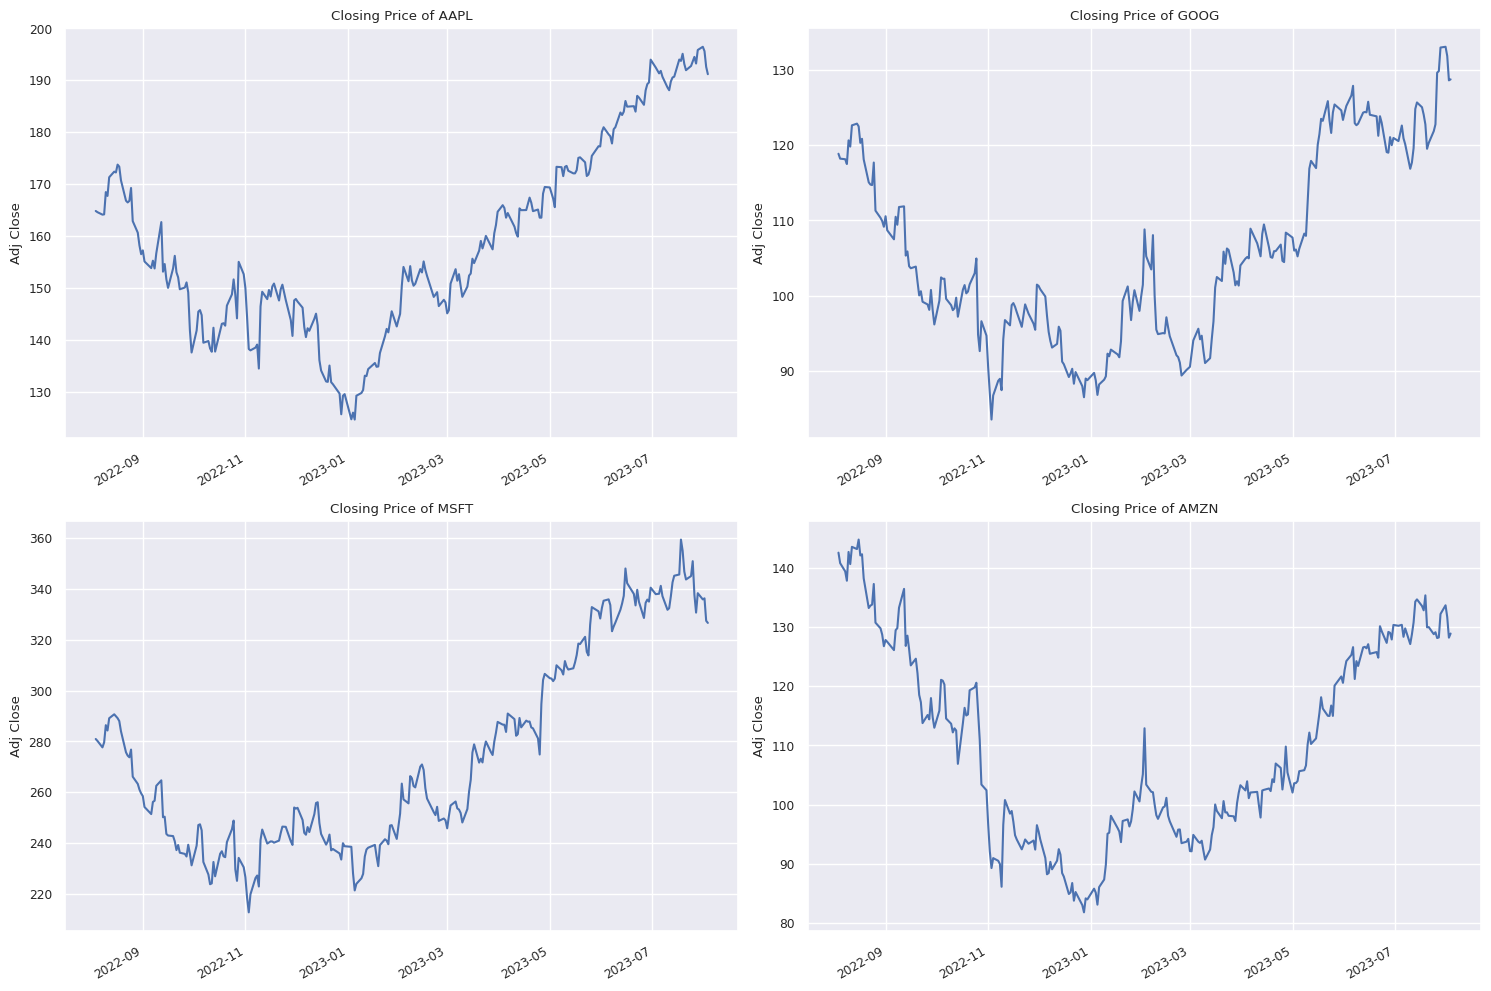

In [144]:
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

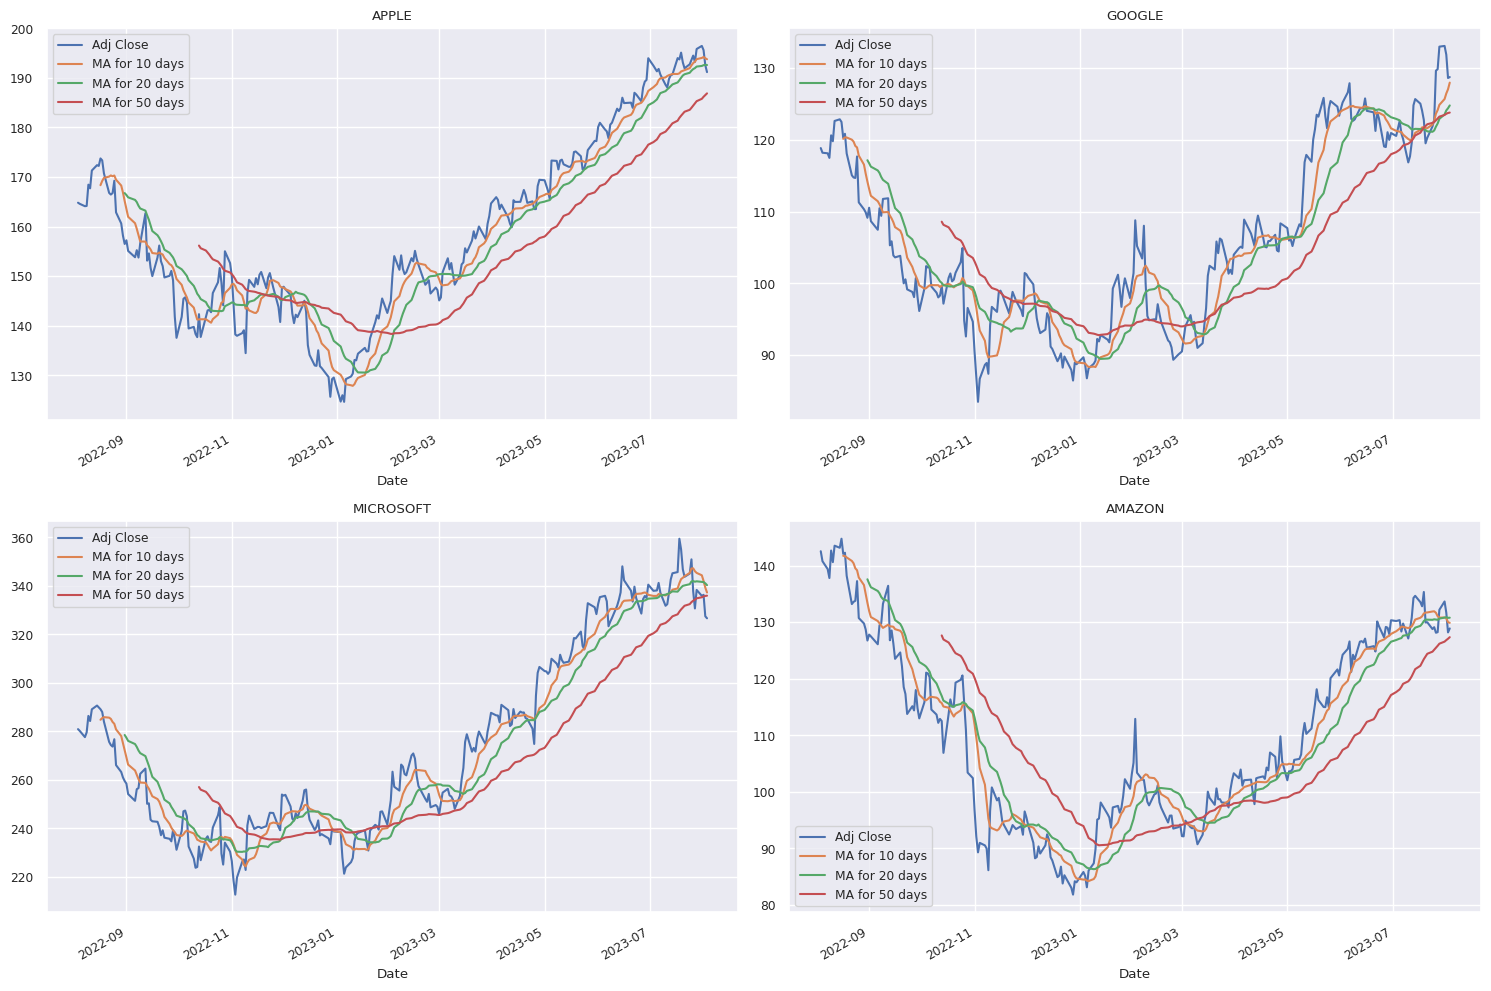

In [145]:
# Moving Averages

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [148]:
from pandas_datareader import data as pdr

yf.pdr_override()
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


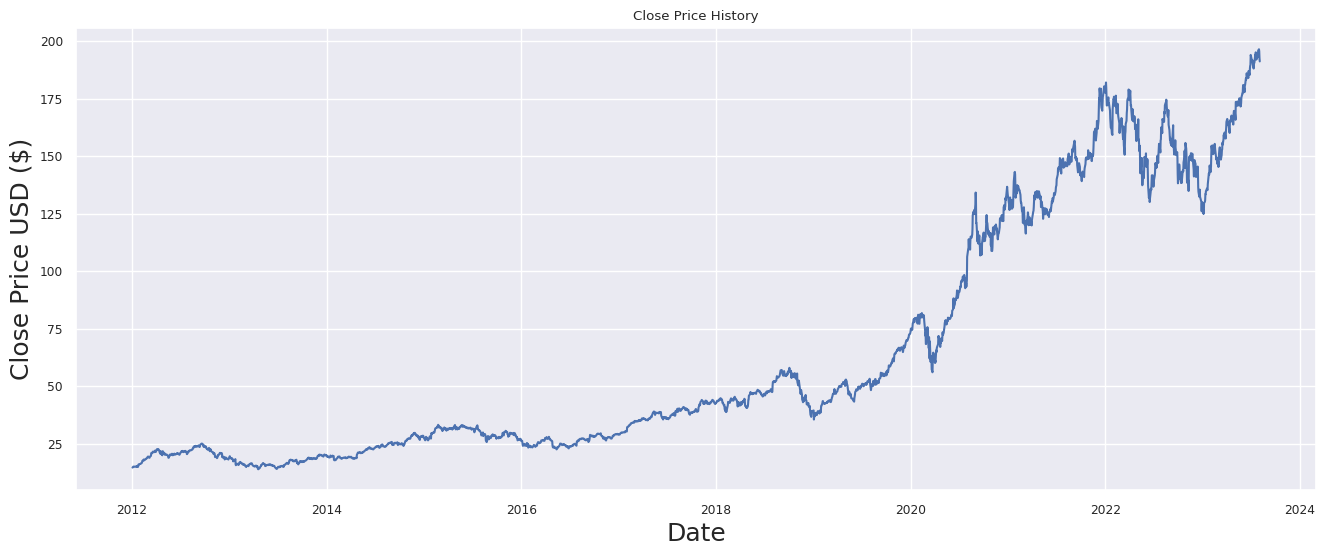

In [149]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [151]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2710/2710 [==============================] - 115s 41ms/step - loss: 0.0013


In [153]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

5/5 [==============================] - 1s 30ms/step


<ipython-input-154-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


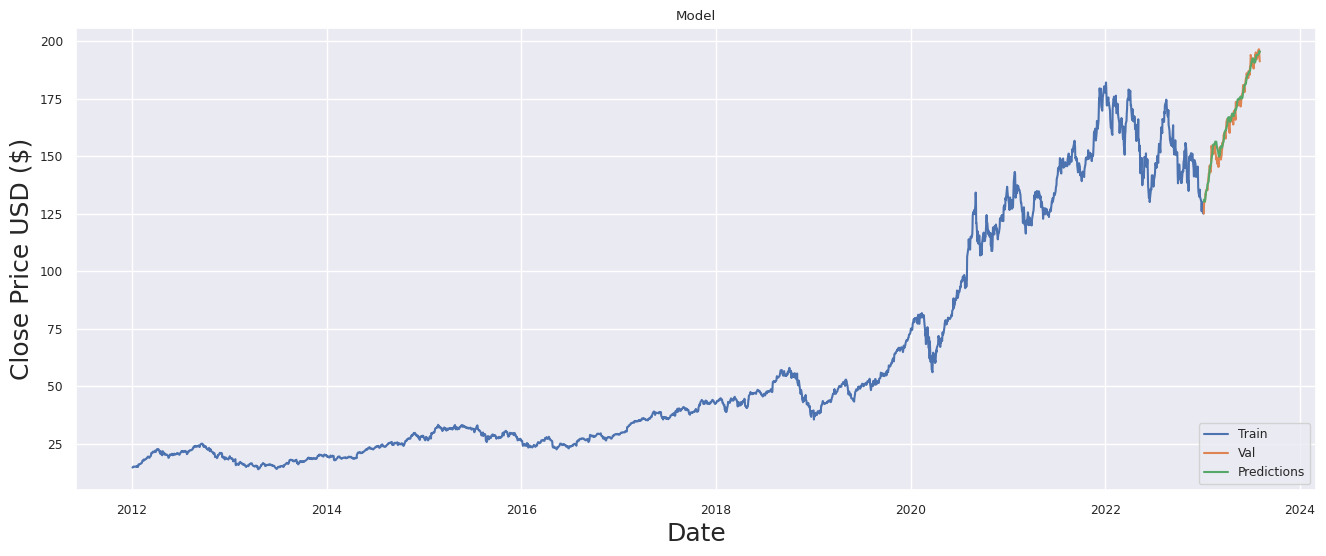

In [154]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()